In [2]:
import os
import sys
sys.path.append('../utils')

from curve_pool_data import get_pool_tx_block_numbers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from contract_utils import init_contract
from network_utils import configure_network_and_connect

import brownie

ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
configure_network_and_connect(
    node_provider_https=f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}",
    network_name='mainnet'
)

In [3]:
steth_pool_addr = "0xDC24316b9AE028F1497c275EB9192a3Ea0f67022"
block_start = 13056724
block_end = brownie.web3.eth.block_number

In [4]:
tx_blocks = get_pool_tx_block_numbers(
    pool_address=steth_pool_addr,
    start_block=block_start,
    stop_block=block_end
)
len(tx_blocks)

Going through 203 ranges ...
Querying between 13056724: 13061724.
Total txes: 200
Querying between 13061724: 13066724.
Total txes: 398
Querying between 13066724: 13071724.
Total txes: 590
Querying between 13071724: 13076724.
Total txes: 764
Querying between 13076724: 13081724.
Total txes: 932
Querying between 13081724: 13086724.
Total txes: 1102
Querying between 13086724: 13091724.
Total txes: 1273
Querying between 13091724: 13096724.
Total txes: 1444
Querying between 13096724: 13101724.
Total txes: 1615
Querying between 13101724: 13106724.
Total txes: 1772
Querying between 13106724: 13111724.
Total txes: 1930
Querying between 13111724: 13116724.
Total txes: 2116
Querying between 13116724: 13121724.
Total txes: 2282
Querying between 13121724: 13126724.
Total txes: 2444
Querying between 13126724: 13131724.
Total txes: 2606
Querying between 13131724: 13136724.
Total txes: 2761
Querying between 13136724: 13141724.
Total txes: 2939
Querying between 13141724: 13146724.
Total txes: 3103
Quer

33324

In [5]:
steth_pool = init_contract(steth_pool_addr)

In [6]:
tx_blocks = sorted(tx_blocks)

In [7]:
save_file_dir = "../data/steth_pool_data.csv"
blocks_done = []
previous_data = pd.DataFrame()
if os.path.exists(save_file_dir):
    previous_data = pd.read_csv(save_file_dir)
    blocks_done = previous_data.block.values
previous_data

""


In [16]:
queries_left = len(tx_blocks)
steth_bal = np.zeros(queries_left)
eth_bal = np.zeros(queries_left)

c = 0
for block in tx_blocks:

    if block in blocks_done:
        print(f"Block {block} is already queried.")
        queries_left -= 1
        continue

    if c % 100 == 0:
        print(f"Fetching data for block {block}. Queries left: {queries_left}")

    steth_balance_at_block = steth_pool.balances(1, block_identifier=block) * 1e-18
    eth_balance_at_block = steth_pool.balances(0, block_identifier=block) * 1e-18

    steth_bal[c] = steth_balance_at_block
    eth_bal[c] = eth_balance_at_block

    queries_left -= 1
    c += 1

data = {
    "block": tx_blocks,
    "steth_pool_balance": list(steth_bal),
    "eth_pool_balance": list(eth_bal)
}
data

Fetching data for block 13056777. Queries left: 33324
Fetching data for block 13061754. Queries left: 33224
Fetching data for block 13066841. Queries left: 33124
Fetching data for block 13072806. Queries left: 33024
Fetching data for block 13079651. Queries left: 32924
Fetching data for block 13086695. Queries left: 32824
Fetching data for block 13093776. Queries left: 32724
Fetching data for block 13100821. Queries left: 32624
Fetching data for block 13109163. Queries left: 32524
Fetching data for block 13115570. Queries left: 32424
Fetching data for block 13123673. Queries left: 32324
Fetching data for block 13131172. Queries left: 32224
Fetching data for block 13139273. Queries left: 32124
Fetching data for block 13146629. Queries left: 32024
Fetching data for block 13155991. Queries left: 31924
Fetching data for block 13165639. Queries left: 31824
Fetching data for block 13172539. Queries left: 31724
Fetching data for block 13180375. Queries left: 31624
Fetching data for block 1318

{'block': [13056777,
  13056783,
  13056938,
  13057016,
  13057020,
  13057070,
  13057229,
  13057282,
  13057282,
  13057293,
  13057298,
  13057326,
  13057570,
  13057593,
  13057614,
  13057630,
  13057637,
  13057717,
  13057797,
  13057812,
  13057821,
  13057871,
  13057927,
  13057932,
  13057943,
  13057954,
  13057956,
  13057959,
  13058047,
  13058047,
  13058178,
  13058258,
  13058320,
  13058420,
  13058429,
  13058531,
  13058532,
  13058602,
  13058604,
  13058671,
  13058707,
  13058742,
  13058800,
  13058900,
  13058946,
  13058946,
  13058949,
  13058949,
  13058956,
  13058994,
  13059051,
  13059068,
  13059070,
  13059082,
  13059109,
  13059137,
  13059166,
  13059186,
  13059210,
  13059235,
  13059273,
  13059449,
  13059548,
  13059782,
  13059789,
  13059832,
  13059839,
  13059997,
  13060139,
  13060159,
  13060200,
  13060348,
  13060360,
  13060362,
  13060400,
  13060445,
  13060453,
  13060473,
  13060532,
  13060547,
  13060582,
  13060586,
  13060

In [17]:
df_queried_data = pd.DataFrame(data)
df_pool_data = pd.concat([df_queried_data, previous_data])
df_pool_data = df_pool_data.sort_values(by='block', ascending=True).reset_index(drop=True)
df_pool_data

,block,steth_pool_balance,eth_pool_balance
0,13056777,546366.241881,517809.916358
1,13056783,546368.720006,517807.441338
2,13056938,546368.777719,518517.713074
3,13057016,546372.745448,518916.708821
4,13057020,546361.736517,518927.708821
...,...,...,...
33319,14070685,588986.413358,568496.887003
33320,14070692,589014.428858,568468.896582
33321,14070702,589225.337304,568258.178644
33322,14070719,583382.237791,563907.137437


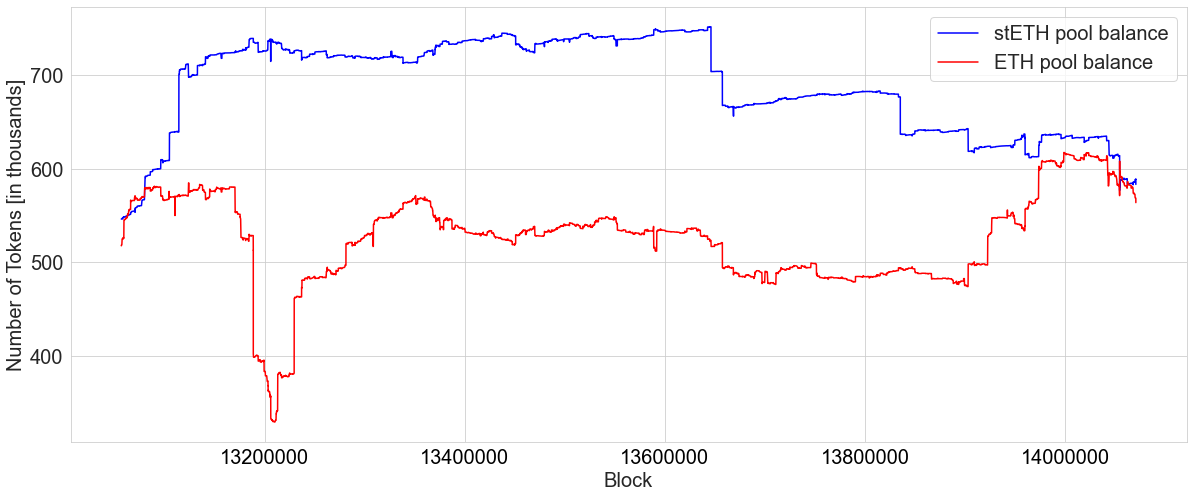

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(
    df_pool_data.block,
    df_pool_data.steth_pool_balance * 1e-3,
    color='blue',
    label='stETH pool balance'
)
ax.plot(
    df_pool_data.block,
    df_pool_data.eth_pool_balance * 1E-3,
    color='red',
    label='ETH pool balance'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in thousands]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [20]:
df_pool_data.to_csv(save_file_dir, index=False)